In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [79]:
df =pd.read_csv("Abandono_clientes.csv", sep = ",")

In [80]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [81]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [83]:
df.CustomerId = df.CustomerId.astype('str')

In [85]:
df = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Variáveis Categóricas

### Gender

In [51]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

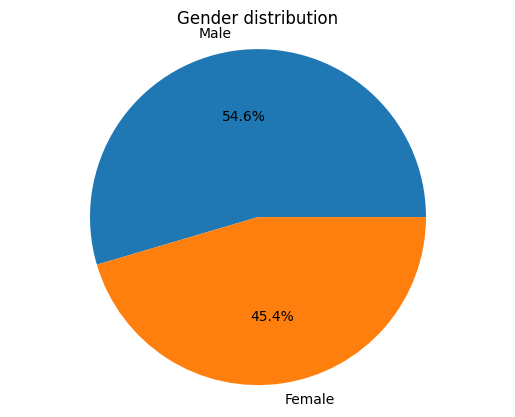

In [52]:
plt.pie(df.Gender.value_counts(), labels=df.Gender.value_counts().index, autopct='%1.1f%%')
plt.title('Gender distribution')
plt.axis('equal')
plt.show()

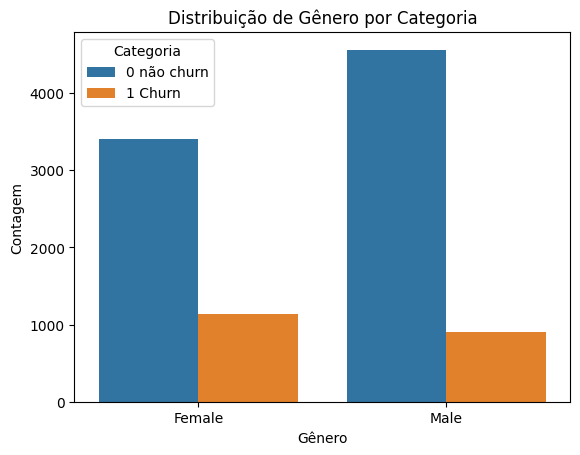

In [53]:
sns.countplot(x='Gender', hue='Exited', data=df)

# Personalizando o gráfico
plt.title('Distribuição de Gênero por Categoria')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Categoria', labels=['0 não churn', '1 Churn'])
plt.show()

Variável "Gender" possui proporções semelhantes entre as duas categorias (Masculino e Feminino). Será removida da modelagem para não ter o risco de obter discriminação do modelo

### Geography

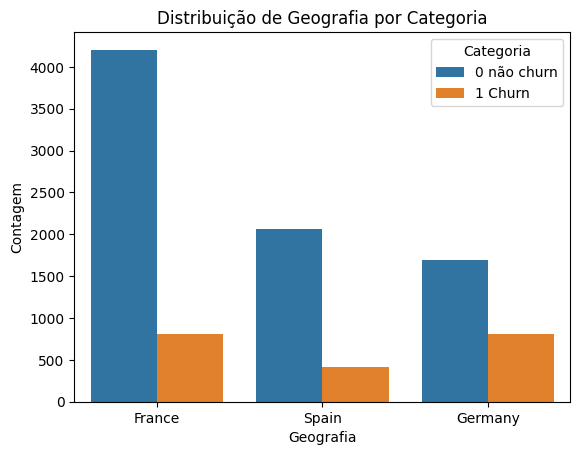

In [54]:
sns.countplot(x='Geography', hue='Exited', data=df)

# Personalizando o gráfico
plt.title('Distribuição de Geografia por Categoria')
plt.xlabel('Geografia')
plt.ylabel('Contagem')
plt.legend(title='Categoria', labels=['0 não churn', '1 Churn'])
plt.show()

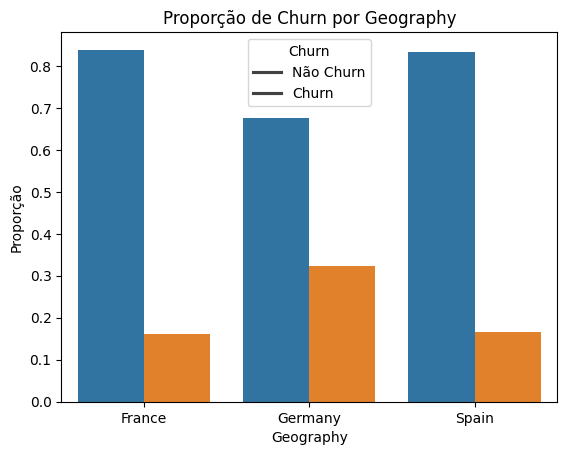

In [55]:
df_proporcao = df.groupby(['Geography', 'Exited']).size().div(df.groupby('Geography').size(), level=0)
df_proporcao = df_proporcao.reset_index(name='proporcao')

# Criando o gráfico de barras empilhadas normalizado
sns.barplot(x='Geography', y='proporcao', hue='Exited', data=df_proporcao)

# Personalizando o gráfico
plt.title('Proporção de Churn por Geography')
plt.xlabel('Geography')
plt.ylabel('Proporção')
plt.legend(title='Churn', labels=['Não Churn', 'Churn'])
plt.show()

In [56]:
df_proporcao.head(6)

,Geography,Exited,proporcao
0,France,0,0.838452
1,France,1,0.161548
2,Germany,0,0.675568
3,Germany,1,0.324432
4,Spain,0,0.833266
5,Spain,1,0.166734


A análise do churn dos países mostra que na Espanha e França em média 16% da população dos países contidos na base dão churn, enquanto a Alemanha é um pouco maior, com 32%

## Variáveis contínuas

### Age

In [57]:
media_idade_por_churn = df.groupby('Exited')['Age'].mean()

print(media_idade_por_churn)

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64


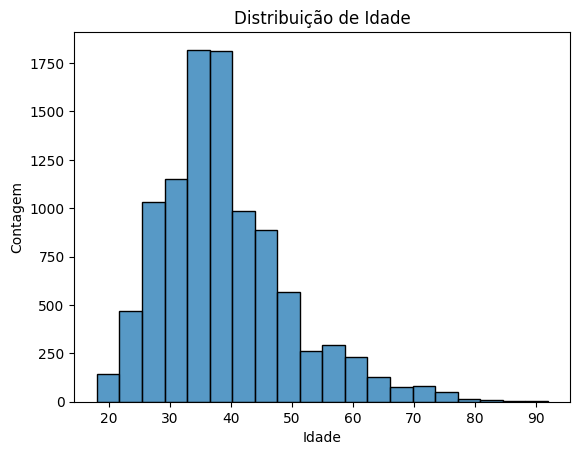

In [58]:
sns.histplot(data=df, x='Age', bins=20)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

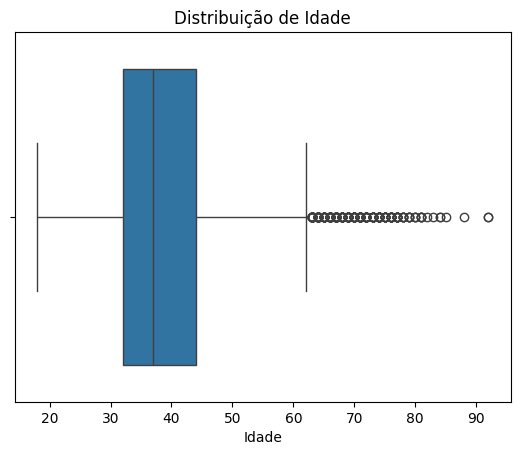

In [59]:
sns.boxplot(x='Age', data=df)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.show()

### CreditScore

In [60]:
media_CreditScore = df.groupby('Exited')['CreditScore'].mean()

print(media_CreditScore)

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64


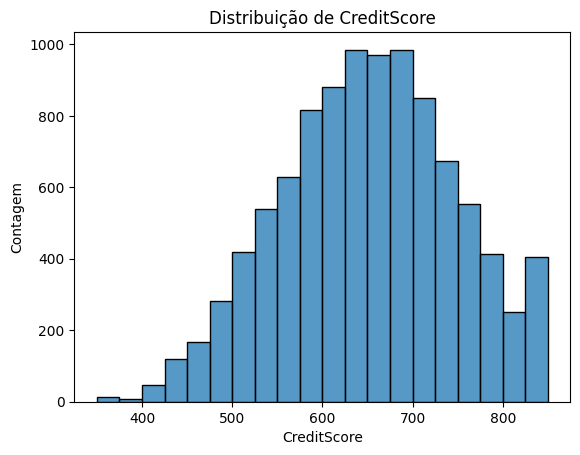

In [61]:
sns.histplot(data=df, x='CreditScore', bins=20)
plt.title('Distribuição de CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Contagem')
plt.show()


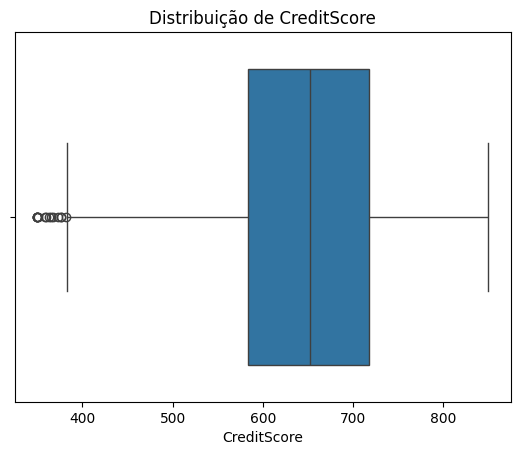

In [62]:
sns.boxplot(x='CreditScore', data=df)
plt.title('Distribuição de CreditScore')
plt.xlabel('CreditScore')
plt.show()

In [66]:
bins = [0, 300, 500, 700, 1000]
labels = [f"{bins[i]} a {bins[i+1]-1}" for i in range(len(bins)-1)]

# Aplicando pd.cut() com os rótulos personalizados
df['Faixa_Score'] = pd.cut(df['CreditScore'], bins=bins, labels=labels)

In [67]:
df['Faixa_Score'].value_counts()

Faixa_Score
500 a 699    6241
700 a 999    3116
300 a 499     643
0 a 299         0
Name: count, dtype: int64

C:\Users\julio\AppData\Local\Temp\ipykernel_5500\1105297195.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_proporcao = df.groupby(['Faixa_Score', 'Exited']).size().div(df.groupby('Faixa_Score').size(), level=0)
C:\Users\julio\AppData\Local\Temp\ipykernel_5500\1105297195.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_proporcao = df.groupby(['Faixa_Score', 'Exited']).size().div(df.groupby('Faixa_Score').size(), level=0)


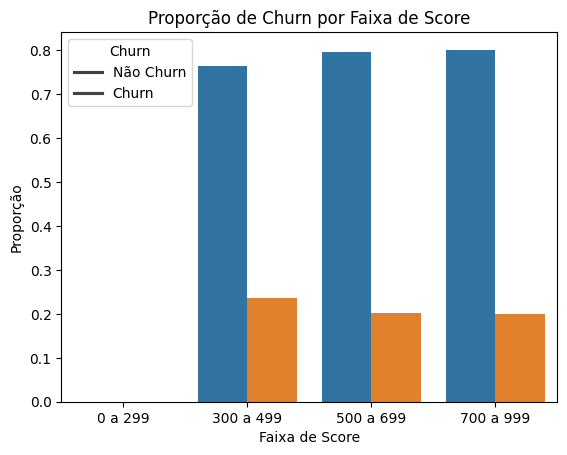

In [76]:
df_proporcao = df.groupby(['Faixa_Score', 'Exited']).size().div(df.groupby('Faixa_Score').size(), level=0)
df_proporcao = df_proporcao.reset_index(name='proporcao')


sns.barplot(x='Faixa_Score', y='proporcao', hue='Exited', data=df_proporcao)

plt.title('Proporção de Churn por Faixa de Score')
plt.xlabel('Faixa de Score')
plt.ylabel('Proporção')
plt.legend(title='Churn', labels=['Não Churn', 'Churn'])
plt.show()

<Axes: xlabel='Faixa_Score', ylabel='proporcao'>

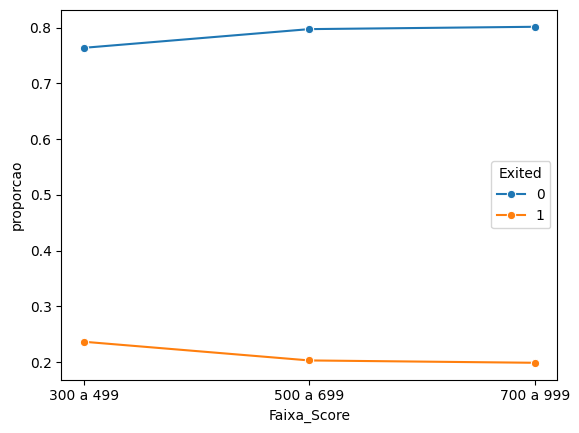

In [73]:
sns.lineplot(x='Faixa_Score', y='proporcao', hue='Exited', data=df_proporcao, marker='o')


In [78]:
df_proporcao.head(10)

,Faixa_Score,Exited,proporcao
0,0 a 299,0,NaN
1,0 a 299,1,NaN
2,300 a 499,0,0.763608
3,300 a 499,1,0.236392
4,500 a 699,0,0.797148
5,500 a 699,1,0.202852
6,700 a 999,0,0.801348
7,700 a 999,1,0.198652


Em geral, a faixa de score de 300 a 499 é a que possui proporcionalmente a maior taxa de churn, com 24%. Mas ainda assim, essa variável se mostrou não ter relevância o suficiente na decisão de churn.

### Tenure

In [87]:
media_tenure_por_churn = df.groupby('Exited')['Tenure'].mean()

print(media_tenure_por_churn)

Exited
0    5.033279
1    4.932744
Name: Tenure, dtype: float64


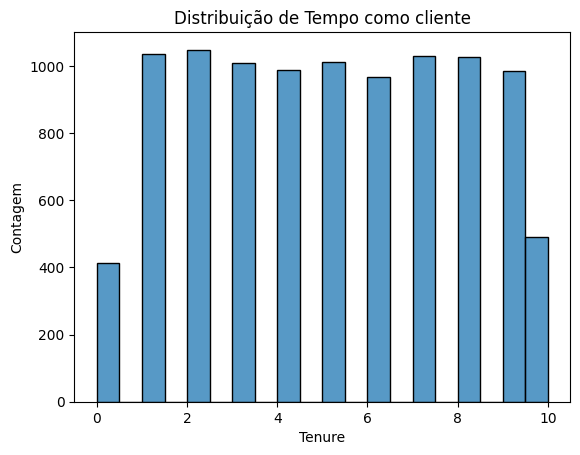

In [88]:
sns.histplot(data=df, x='Tenure', bins=20)
plt.title('Distribuição de Tempo como cliente')
plt.xlabel('Tenure')
plt.ylabel('Contagem')
plt.show()

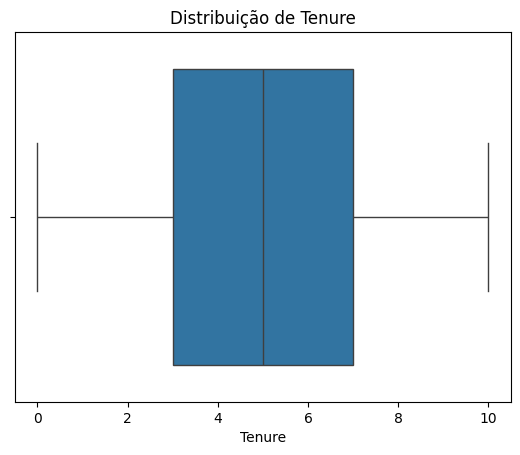

In [89]:
sns.boxplot(x='Tenure', data=df)
plt.title('Distribuição de Tenure')
plt.xlabel('Tenure')
plt.show()